In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/improving-naval-vessel-condition-through-machine/data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("/kaggle/input/improving-naval-vessel-condition-through-machine/data.csv")
data.head(11)

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
5,5,6.175,18,29792.731,2307.404,8828.360,246.278,246.278,800.434,288,676.397,2.501,0.998,13.356,1.030,35.760,0.708,0.95,0.975
6,6,7.148,21,38982.180,2678.086,9132.429,332.077,332.077,854.747,288,699.954,2.963,0.998,15.679,1.035,45.881,0.908,0.95,0.975
7,7,8.206,24,50996.808,3087.561,9318.562,437.989,437.989,952.122,288,741.770,3.576,0.998,18.632,1.040,62.440,1.236,0.95,0.975
8,8,9.300,27,72763.329,3560.395,9778.528,644.905,644.905,1115.797,288,789.094,4.498,0.998,22.811,1.049,92.556,1.832,0.95,0.975
9,9,1.138,3,379.880,1355.375,6683.916,7.915,7.915,464.017,288,550.985,1.100,0.998,5.963,1.019,3.879,0.079,0.95,0.976


# Performing Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     11934 non-null  int64  
 1   Lever position                                            11934 non-null  float64
 2   Ship speed (v)                                            11934 non-null  int64  
 3   Gas Turbine (GT) shaft torque (GTT) [kN m]                11934 non-null  float64
 4   GT rate of revolutions (GTn) [rpm]                        11934 non-null  float64
 5   Gas Generator rate of revolutions (GGn) [rpm]             11934 non-null  float64
 6   Starboard Propeller Torque (Ts) [kN]                      11934 non-null  float64
 7   Port Propeller Torque (Tp) [kN]                           11934 non-null  float64
 8   Hight Pressure (

In [5]:
data.shape

(11934, 19)

In [6]:
data= data.drop("index",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Lever position                                            11934 non-null  float64
 1   Ship speed (v)                                            11934 non-null  int64  
 2   Gas Turbine (GT) shaft torque (GTT) [kN m]                11934 non-null  float64
 3   GT rate of revolutions (GTn) [rpm]                        11934 non-null  float64
 4   Gas Generator rate of revolutions (GGn) [rpm]             11934 non-null  float64
 5   Starboard Propeller Torque (Ts) [kN]                      11934 non-null  float64
 6   Port Propeller Torque (Tp) [kN]                           11934 non-null  float64
 7   Hight Pressure (HP) Turbine exit temperature (T48) [C]    11934 non-null  float64
 8   GT Compressor in

In [7]:
data.isnull().sum()

Lever position                                              0
Ship speed (v)                                              0
Gas Turbine (GT) shaft torque (GTT) [kN m]                  0
GT rate of revolutions (GTn) [rpm]                          0
Gas Generator rate of revolutions (GGn) [rpm]               0
Starboard Propeller Torque (Ts) [kN]                        0
Port Propeller Torque (Tp) [kN]                             0
Hight Pressure (HP) Turbine exit temperature (T48) [C]      0
GT Compressor inlet air temperature (T1) [C]                0
GT Compressor outlet air temperature (T2) [C]               0
HP Turbine exit pressure (P48) [bar]                        0
GT Compressor inlet air pressure (P1) [bar]                 0
GT Compressor outlet air pressure (P2) [bar]                0
GT exhaust gas pressure (Pexh) [bar]                        0
Turbine Injecton Control (TIC) [%]                          0
Fuel flow (mf) [kg/s]                                       0
GT Compr

In [8]:
data.drop_duplicates()

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [9]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i]=enc.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Lever position                                            11934 non-null  float64
 1   Ship speed (v)                                            11934 non-null  int64  
 2   Gas Turbine (GT) shaft torque (GTT) [kN m]                11934 non-null  float64
 3   GT rate of revolutions (GTn) [rpm]                        11934 non-null  float64
 4   Gas Generator rate of revolutions (GGn) [rpm]             11934 non-null  float64
 5   Starboard Propeller Torque (Ts) [kN]                      11934 non-null  float64
 6   Port Propeller Torque (Tp) [kN]                           11934 non-null  float64
 7   Hight Pressure (HP) Turbine exit temperature (T48) [C]    11934 non-null  float64
 8   GT Compressor in

data.head

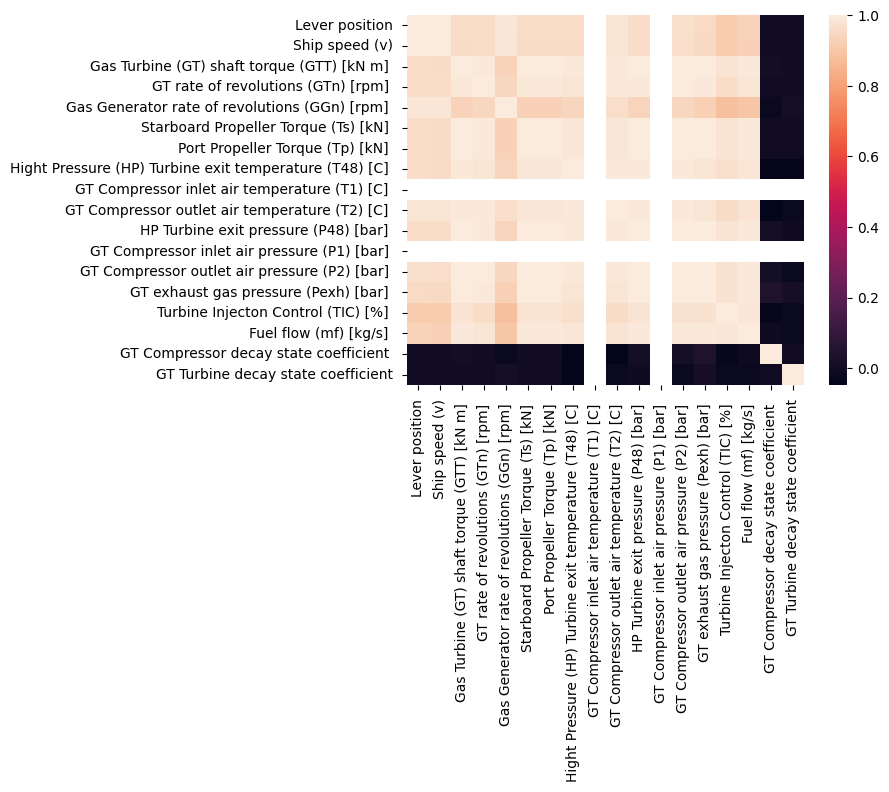

In [10]:
dataplot=sns.heatmap(data.corr())
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
data.columns

Index(['Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'GT Compressor decay state coefficient  ',
       'GT Turbine decay state coefficient '],
      dtype='object')

In [13]:
data.columns=['Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ','compressor decay','turbine decay']

In [14]:
y=data.loc[:,["compressor decay","turbine decay",]]
x=data.drop(['compressor decay','turbine decay'],axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = Normalizer().fit_transform(x)

# Data-splitting: Testing and Training

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(9547, 16) (9547, 2) (2387, 16) (2387, 2)


# Decision Tree Regressor

In [17]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(random_state=0)
model1= model1.fit(x_train,y_train)

# Evaluation: DT Regressor

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
p=model1.predict(x_test)
print(f"MSE      = {mean_squared_error(p,y_test):.8f}")
print(f"MAE      = {mean_absolute_error(p,y_test):.5f}")
print(f"MAPE     = {mean_absolute_percentage_error(p,y_test):.5f}")
print(f"r2 Score = {r2_score(p,y_test):.4f}")

MSE      = 0.00000326
MAE      = 0.00110
MAPE     = 0.00112
r2 Score = 0.9640


# Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators = 300, max_depth = 25)
model2.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, n_estimators=300)

# Evaluation: RF Regressor

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
p2=model2.predict(x_test)
print(f"MSE = {mean_squared_error(p2,y_test):.8f}")
print(f"MAE = {mean_absolute_error(p2,y_test):.5f}")
print(f"MAPE = {mean_absolute_percentage_error(p2,y_test):.5f}")
print(f"r2 Score = {r2_score(p2,y_test):.4f}")

MSE = 0.00000059
MAE = 0.00040
MAPE = 0.00041
r2 Score = 0.9935
